In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv(r"C:\Users\Devatraj\MLproj\Datasets\Churn_Modelling.csv")


In [2]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(["Geography","Gender"],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [52]:
classifier=Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=19,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [53]:
classifier.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001F6519AD640>>

In [54]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5810 - accuracy: 0.7682 - val_loss: 0.5088 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5207 - accuracy: 0.7918 - val_loss: 0.4844 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.7964 - val_loss: 0.4702 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4859 - accuracy: 0.7975 - val_loss: 0.4570 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4727 - accuracy: 0.8016 - val_loss: 0.4520 - val_accuracy: 0.7967
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4686 - accuracy: 0.7968 - val_loss: 0.4478 - val_accuracy: 0.7978
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4555 - accuracy: 0.8007 - val_loss: 0.4440 - val_accuracy: 0.7952

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3771 - accuracy: 0.8447 - val_loss: 0.3682 - val_accuracy: 0.8398
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3778 - accuracy: 0.8386 - val_loss: 0.3753 - val_accuracy: 0.8243
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8391 - val_loss: 0.3692 - val_accuracy: 0.8425
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3761 - accuracy: 0.8375 - val_loss: 0.3699 - val_accuracy: 0.8368
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.8384 - val_loss: 0.3731 - val_accuracy: 0.8357
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8410 - val_loss: 0.3741 - val_accuracy: 0.8300
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3834 - accuracy: 0.8367 - val_loss: 0.3683 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


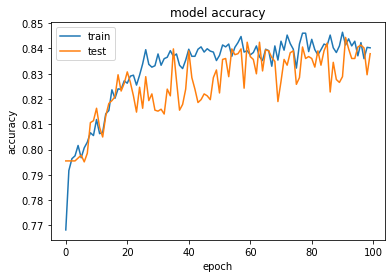

In [55]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

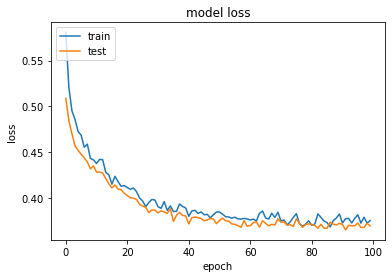

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 767us/step


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [59]:
print(score)

0.8505
